In [10]:
import pandas as pd
df = pd.read_excel("review.xlsx")  # 파일명 바꿔주세요
df.head()


,별점,리뷰 내용
0,2,네이버의장점은 타사이트와 비교후 더 괜찮은 사이트에서 구매하는건데 네이버상품만 모아...
1,3,쿠폰 적용 쉬워서 매번 잘 이용합니다. 쇼핑이 더 즐거워졌어요.
2,1,앱이 너무 느려서 쓰다가 꺼버린 적 많아요. 개선 필요합니다.
3,4,밤에 앱 쓸 때마다 눈이 시려요. 다크모드 좀 제발요.
4,5,앱이 직관적이고 쇼핑 과정이 간편해서 자주 써요.


In [11]:
df.isnull().sum()

별점       0
리뷰 내용    0
dtype: int64

In [12]:
df.shape

(200, 2)

In [13]:
df.dtypes

별점        int64
리뷰 내용    object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   별점      200 non-null    int64 
 1   리뷰 내용   200 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


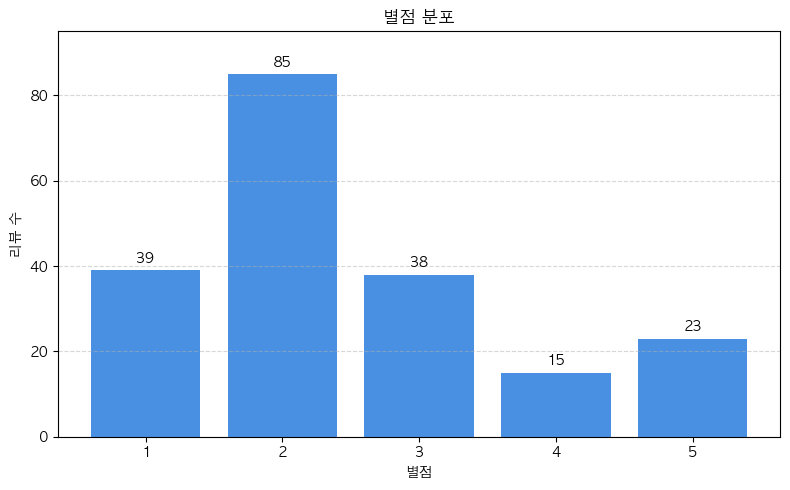

In [15]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (macOS용)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 별점 분포 계산
rating_counts = df['별점'].value_counts().sort_index()

# 그래프 크기 설정
plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index, rating_counts.values, color='#4A90E2')

# y축 범위 조정 (막대 위 숫자 안 잘리게)
plt.ylim(0, max(rating_counts.values) + 10)

# 막대 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 1,               # 숫자를 약간 위로
             f'{int(height)}',
             ha='center', va='bottom',
             fontsize=10)

# 축 라벨 및 제목
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.title('별점 분포')

# 가독성을 위한 가로선 추가
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [16]:
pip install konlpy


Note: you may need to restart the kernel to use updated packages.


In [17]:
from konlpy.tag import Okt
from collections import Counter
import re

okt = Okt()

def clean_text(text):
    text = re.sub(r'[^가-힣\s]', '', str(text))  # 한글과 공백만 남기기
    return text.strip()

def extract_nouns(text):
    text = clean_text(text)
    return [noun for noun in okt.nouns(text) if len(noun) > 1]  # 한 글자 제외

# 별점별 리뷰 데이터프레임 분리
rating_groups = {score: df[df['별점'] == score]['리뷰 내용'].dropna() for score in range(1, 6)}

# 각 별점 그룹별 키워드 카운트 저장
keyword_counts = {}

for score, reviews in rating_groups.items():
    nouns = []
    for review in reviews:
        nouns.extend(extract_nouns(review))
    keyword_counts[score] = Counter(nouns).most_common(20)


In [18]:
for score in range(1, 6):
    print(f"\n⭐️ 별점 {score} 키워드 TOP 20")
    for word, count in keyword_counts[score]:
        print(f"{word}: {count}")



⭐️ 별점 1 키워드 TOP 20
그냥: 8
결제: 8
가격: 8
비교: 8
네이버: 7
사용: 7
상품: 7
쿠팡: 6
쿠폰: 6
알림: 6
쇼핑: 5
검색: 5
계속: 5
배송: 4
혜택: 4
다크: 3
모드: 3
스토어: 3
제품: 3
멤버십: 3

⭐️ 별점 2 키워드 TOP 20
복사: 30
상품: 27
번호: 22
네이버: 20
비교: 16
송장: 16
배송: 15
가격: 13
검색: 13
주문: 10
다크: 10
모드: 10
문의: 9
기능: 9
조회: 8
알림: 8
사이트: 7
구매: 7
혜택: 7
쇼핑: 7

⭐️ 별점 3 키워드 TOP 20
상품: 11
가격: 9
다크: 9
모드: 9
네이버: 8
기능: 7
비교: 7
이벤트: 6
쿠폰: 5
쇼핑: 5
자주: 5
사용: 4
필터: 4
요청: 4
복사: 4
알림: 3
화면: 3
추가: 3
정말: 3
개선: 3

⭐️ 별점 4 키워드 TOP 20
쇼핑: 9
다크: 4
모드: 4
적립금: 3
상품: 3
복사: 3
추천: 2
지원: 2
자주: 2
번호: 2
운송: 2
네이버: 2
정렬: 2
혜택: 2
제발: 1
매번: 1
언제: 1
계속: 1
의향: 1
저녁: 1

⭐️ 별점 5 키워드 TOP 20
자주: 6
이벤트: 5
배송: 5
혜택: 5
쇼핑: 4
쿠폰: 4
상품: 4
직관: 3
재미: 3
결제: 3
적립: 3
진즉: 2
적립금: 2
생각: 2
추천: 2
이용: 2
포인트: 2
고객: 2
센터: 2
안내: 2


In [20]:
from collections import defaultdict
import pandas as pd

# 별점별 키워드 목록 수동 입력
keywords_by_rating = {
    1: ['그냥', '결제', '가격', '비교', '네이버', '사용', '상품', '쿠팡', '쿠폰', '알림', '쇼핑', '검색', '계속', '배송', '혜택', '다크', '모드', '스토어', '제품', '멤버십'],
    2: ['복사', '상품', '번호', '네이버', '비교', '송장', '배송', '가격', '검색', '주문', '다크', '모드', '문의', '기능', '조회', '알림', '사이트', '구매', '혜택', '쇼핑'],
    3: ['상품', '가격', '다크', '모드', '네이버', '기능', '비교', '이벤트', '쿠폰', '쇼핑', '자주', '사용', '필터', '요청', '복사', '알림', '화면', '추가', '정말', '개선'],
    4: ['쇼핑', '다크', '모드', '적립금', '상품', '복사', '추천', '지원', '자주', '번호', '운송', '네이버', '정렬', '혜택', '제발', '매번', '언제', '계속', '의향', '저녁'],
    5: ['자주', '이벤트', '배송', '혜택', '쇼핑', '쿠폰', '상품', '직관', '재미', '결제', '적립', '진즉', '적립금', '생각', '추천', '이용', '포인트', '고객', '센터', '안내']
}

# 카테고리 사전 기반 자동 분류
category_keywords = {
    "UI/UX": ["화면", "속도", "버벅임", "다크", "모드", "접속", "가독성", "메뉴", "직관", "정렬", "기능", "필터", "추가"],
    "결제/쿠폰": ["결제", "쿠폰", "혜택", "할인", "멤버십", "적립", "적립금", "포인트"],
    "배송/알림": ["배송", "송장", "운송", "알림", "주문", "예상", "위치"],
    "고객센터": ["문의", "고객", "센터", "CS", "리뷰", "안내", "응대"]
}

# 자동 분류 함수
def map_to_category(word):
    for category, words in category_keywords.items():
        if any(w in word for w in words):
            return category
    return "기타"

# 각 별점에서의 카테고리 누적 빈도
category_by_rating = {score: defaultdict(int) for score in range(1, 6)}

for score, keywords in keywords_by_rating.items():
    for word in keywords:
        category = map_to_category(word)
        category_by_rating[score][category] += 1

# 결과를 데이터프레임으로 정리
df_result = pd.DataFrame(category_by_rating).fillna(0).astype(int).T
df_result.index.name = "별점"
df_result.columns.name = "카테고리"

# 결과 출력
from IPython.display import display
display(df_result)

카테고리,기타,결제/쿠폰,배송/알림,UI/UX,고객센터
별점,,,,,
1,12,4,2,2,0
2,11,1,4,3,1
3,12,1,1,6,0
4,14,2,1,3,0
5,9,6,1,1,3


In [ ]:
import openai
import pandas as pd
import time

# ✅ 최신 방식: 클라이언트 생성
from openai import OpenAI
client = OpenAI(api_key="")  # ← 본인 키로 교체

# ✅ 리뷰 데이터 로드
df = pd.read_excel("review.xlsx")  # 파일명 맞게 수정
df = df.dropna(subset=['리뷰 내용']).reset_index(drop=True)

# ✅ 프롬프트 함수
def build_prompt(review):
    return f"""
다음 고객 리뷰를 읽고, 가장 적절한 하나의 카테고리로 분류해주세요.

카테고리:
1. UI/UX (화면, 접근성, 다크모드 등)
2. 결제/쿠폰 (결제 오류, 쿠폰 문제, 혜택 등)
3. 배송/알림 (배송 지연, 알림 부족 등)
4. 고객센터 (응대, 문의, 리뷰 시스템 등)
5. 기타

리뷰: "{review}"

응답 형식: 카테고리명만 한 단어로 출력 (예: 결제/쿠폰)
"""

# ✅ 결과 저장
category_results = []

# ✅ GPT 요청 루프 (최신 API)
for i, review in enumerate(df['리뷰 내용']):
    prompt = build_prompt(review)

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
        )
        category = response.choices[0].message.content.strip()
        category_results.append(category)

    except Exception as e:
        print(f"[{i}] 에러 발생: {e}")
        category_results.append("에러")

    time.sleep(1)  # 속도 제한 방지

# ✅ 결과 저장 및 확인
df['카테고리'] = category_results
df.to_excel("리뷰_카테고리_분류결과.xlsx", index=False)

print(df['카테고리'].value_counts())


카테고리
UI/UX    112
결제/쿠폰     29
배송/알림     25
기타        21
고객센터      13
Name: count, dtype: int64


In [ ]:
import pandas as pd
from openai import OpenAI
import time
from tqdm import tqdm  # ✅ progress bar

# ✅ OpenAI API Key
client = OpenAI(api_key="")  # ← 본인 키로 교체

# ✅ 리뷰 데이터 불러오기
df = pd.read_excel("review.xlsx")  # ← 파일명 확인
df = df.dropna(subset=['리뷰 내용']).reset_index(drop=True)

# ✅ 프롬프트 생성 함수
def build_prompt(review):
    return f"""
다음 고객 리뷰를 읽고, 가장 적절한 하나의 카테고리로 분류해주세요.

카테고리:
1. UI/UX (화면, 접근성, 다크모드 등)
2. 결제/쿠폰 (결제 오류, 쿠폰 문제, 혜택 등)
3. 배송/알림 (배송 지연, 알림 부족 등)
4. 고객센터 (응대, 문의, 리뷰 시스템 등)
5. 기타

리뷰: "{review}"

응답 형식: 카테고리명만 한 단어로 출력 (예: 결제/쿠폰)
"""

# ✅ 분류 결과 저장 리스트
category_results = []

# ✅ tqdm progress bar + GPT 분류 요청
for review in tqdm(df['리뷰 내용'], desc="리뷰 분류 중..."):
    prompt = build_prompt(review)

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0
        )
        category = response.choices[0].message.content.strip()
        category_results.append(category)

    except Exception as e:
        print(f"에러 발생: {e}")
        category_results.append("에러")

    time.sleep(1)

# ✅ 결과 저장
df['카테고리'] = category_results

# ✅ 카테고리 빈도: 별점별 Pivot Table 생성
pivot = df.pivot_table(index='별점', columns='카테고리', aggfunc='size', fill_value=0)
pivot = pivot[['기타', '결제/쿠폰', '배송/알림', 'UI/UX', '고객센터']]  # 원하는 순서로 정렬

# ✅ 출력 및 저장
print("\n📊 별점별 카테고리 분포")
print(pivot)

pivot.to_excel("별점별_카테고리_분포표.xlsx")
df.to_excel("리뷰_카테고리_분류결과.xlsx", index=False)


리뷰 분류 중...: 100%|██████████| 200/200 [05:15<00:00,  1.58s/it]


📊 별점별 카테고리 분포
카테고리  기타  결제/쿠폰  배송/알림  UI/UX  고객센터
별점                                 
1      3      9      6     18     3
2      7      6     14     51     6
3      5      3      2     26     2
4      2      2      0     11     0
5      3      8      3      7     2


In [26]:
df['카테고리'].value_counts()

카테고리
UI/UX    113
결제/쿠폰     28
배송/알림     25
기타        20
고객센터      13
알림/알림      1
Name: count, dtype: int64

In [51]:
import pandas as pd

# ✅ 기존 결과 파일 불러오기
df = pd.read_excel("리뷰_카테고리_분류결과.xlsx")

# ✅ 오타/오분류 정제 매핑
fix_dict = {
    "알림/알림": "배송/알림",
    # 필요한 경우 여기 추가 가능
    # "결재/쿠폰": "결제/쿠폰",
    # "CS센터": "고객센터"
}

# ✅ 오분류 카테고리 정정
df['카테고리'] = df['카테고리'].replace(fix_dict)

# ✅ 피벗 테이블 생성
pivot = df.pivot_table(index='별점', columns='카테고리', aggfunc='size', fill_value=0)

# ✅ 컬럼 정렬 (선택 사항)
ordered_columns = ['기타', '결제/쿠폰', '배송/알림', 'UI/UX', '고객센터']
pivot = pivot.reindex(columns=ordered_columns, fill_value=0)

# ✅ 결과 출력 및 저장
print("\n📊 별점별 카테고리 분포 (정제 후)")
print(pivot)

pivot.to_excel("별점별_카테고리_정제후_분포표.xlsx", index=True)
df.to_excel("리뷰_카테고리_정제후.xlsx", index=False)



📊 별점별 카테고리 분포 (정제 후)
카테고리  기타  결제/쿠폰  배송/알림  UI/UX  고객센터
별점                                 
1      3      9      6     18     3
2      7      6     15     51     6
3      5      3      2     26     2
4      2      2      0     11     0
5      3      8      3      7     2


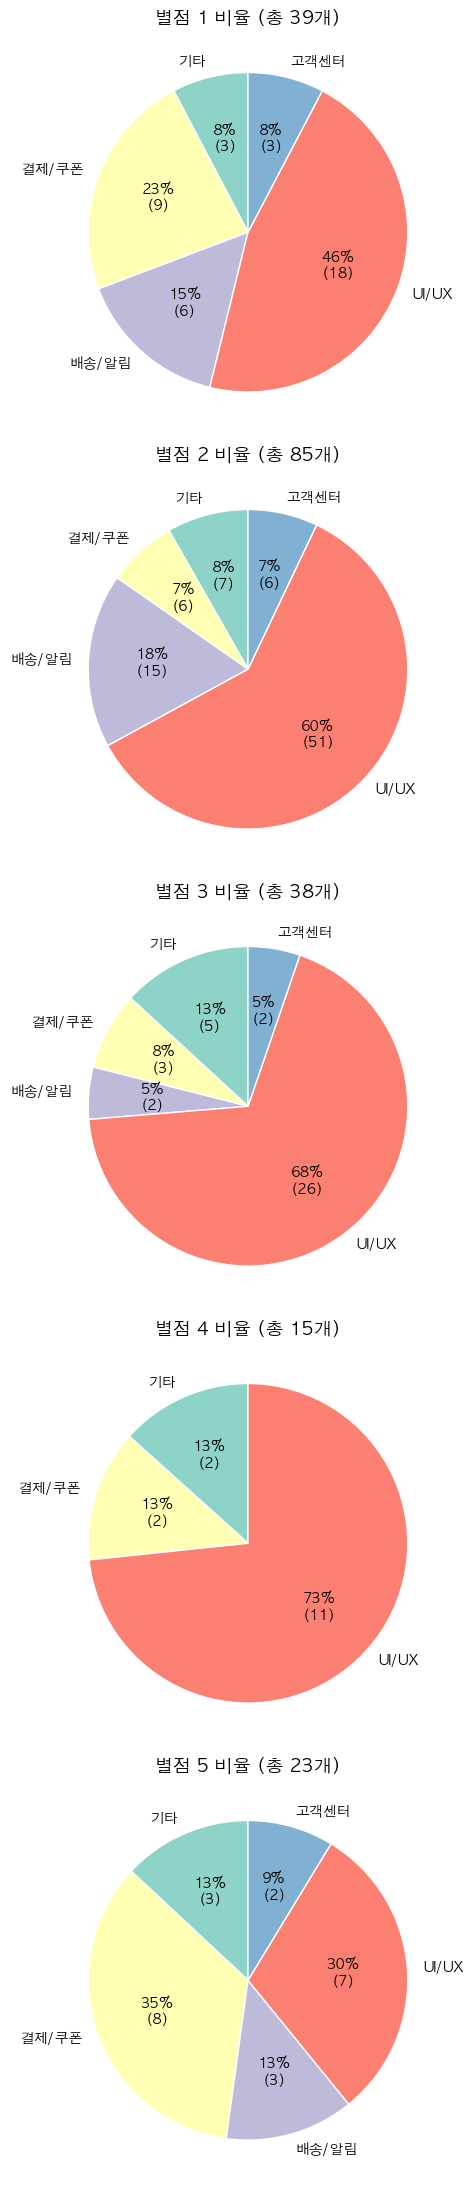

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 엑셀에서 데이터 불러오기
df = pd.read_excel("리뷰_카테고리_정제후.xlsx")
df = df.dropna(subset=["별점", "카테고리"])

# ✅ 카테고리 순서 & 색상 매핑
category_order = ["기타", "결제/쿠폰", "배송/알림", "UI/UX", "고객센터"]
category_colors = {
    "기타": "#8dd3c7",
    "결제/쿠폰": "#ffffb3",
    "배송/알림": "#bebada",
    "UI/UX": "#fb8072",
    "고객센터": "#80b1d3"
}

# ✅ 차트 설정
fig, axes = plt.subplots(5, 1, figsize=(6, 22))

# ✅ 퍼센트+개수 라벨 함수
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct / 100.0 * total))
        return f'{pct:.0f}%\n({count})'
    return my_autopct

# ✅ 별점별 파이차트 생성
for i, score in enumerate(sorted(df['별점'].unique())):
    ax = axes[i]
    
    sub_counts = df[df['별점'] == score]['카테고리'].value_counts()
    sub_counts = sub_counts.reindex(category_order).dropna()
    total_count = int(sub_counts.sum())
    
    # ✅ 카테고리별 색 고정
    colors = [category_colors[cat] for cat in sub_counts.index]

    sub_counts.plot.pie(
        ax=ax,
        autopct=make_autopct(sub_counts.values),
        startangle=90,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    
    ax.set_ylabel('')
    ax.set_title(f'별점 {score} 비율 (총 {total_count}개)', fontsize=13)

plt.tight_layout()
plt.show()
